<a target="_blank" href="https://colab.research.google.com/github/JorgeAvilaG/spanish-electricity-network-eda/blob/main/process_data.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/2015-01-01_2022-11-22_data.csv")
df.head()

,datetime,Carbón,Ciclo combinado,Cogeneración y resto,Enlace Península-Baleares,Eólica,Fuel-gas,Hidráulica,Intercambios,No renovable,Nuclear,Renovable,Resto generación,Solar,Solar fotovoltaica,Solar térmica,Térmica renovable
0,2015-01-01T00:00:00.000+01:00,30896.0,20343.0,NaN,-794.0,38586.0,0.0,12730.0,-7370.0,100993.0,42567.0,51604.0,15351.0,288.0,NaN,NaN,NaN
1,2015-01-01T01:00:00.000+01:00,30557.0,22882.0,NaN,-620.0,35581.0,0.0,10861.0,-10359.0,100323.0,42574.0,46730.0,15289.0,288.0,NaN,NaN,NaN
2,2015-01-01T02:00:00.000+01:00,29609.0,21380.0,NaN,-520.0,32951.0,0.0,7390.0,-11769.0,96541.0,42582.0,40629.0,15259.0,288.0,NaN,NaN,NaN
3,2015-01-01T03:00:00.000+01:00,26539.0,17968.0,NaN,-372.0,31491.0,0.0,1886.0,-7305.0,94672.0,42590.0,33665.0,15252.0,288.0,NaN,NaN,NaN
4,2015-01-01T04:00:00.000+01:00,24265.0,16699.0,NaN,-362.0,29708.0,0.0,-528.0,-5620.0,92478.0,42584.0,29428.0,14912.0,248.0,NaN,NaN,NaN


In [3]:
renov = [
        'Solar',
        'Solar fotovoltaica',
        'Solar térmica',
        'Térmica renovable',
        'Hidráulica',
        'Eólica',
    'Renovable',
        ]

non_renov = ['Carbón',
          'Ciclo combinado',
          'Cogeneración y resto',
          'Enlace Península-Baleares',
          'Fuel-gas',
          'Intercambios',
          'Nuclear',
          'Resto generación',
             'No renovable',
          ]
print(len(renov)+len(non_renov))
print(len(df.columns))

16
17


In [4]:
df.index = df['datetime']
df.index = pd.to_datetime(df.index,utc=True).tz_convert('CET')
df = df.drop('datetime', axis=1)
df['total'] = df['Renovable'] + df['No renovable']
df = df.div(df["total"],axis=0)
df['year'] = df.index.year
df.head()

,Carbón,Ciclo combinado,Cogeneración y resto,Enlace Península-Baleares,Eólica,Fuel-gas,Hidráulica,Intercambios,No renovable,Nuclear,Renovable,Resto generación,Solar,Solar fotovoltaica,Solar térmica,Térmica renovable,total,year
datetime,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,0.202468,0.133312,NaN,-0.005203,0.252862,0.0,0.083422,-0.048297,0.661828,0.278950,0.338172,0.100598,0.001887,NaN,NaN,NaN,1.0,2015
2015-01-01 01:00:00+01:00,0.207796,0.155604,NaN,-0.004216,0.241960,0.0,0.073858,-0.070444,0.682223,0.289515,0.317777,0.103969,0.001958,NaN,NaN,NaN,1.0,2015
2015-01-01 02:00:00+01:00,0.215856,0.155865,NaN,-0.003791,0.240220,0.0,0.053875,-0.085799,0.703805,0.310432,0.296195,0.111242,0.002100,NaN,NaN,NaN,1.0,2015
2015-01-01 03:00:00+01:00,0.206791,0.140006,NaN,-0.002899,0.245377,0.0,0.014696,-0.056920,0.737683,0.331861,0.262317,0.118843,0.002244,NaN,NaN,NaN,1.0,2015
2015-01-01 04:00:00+01:00,0.199047,0.136983,NaN,-0.002970,0.243696,0.0,-0.004331,-0.046101,0.758601,0.349318,0.241399,0.122324,0.002034,NaN,NaN,NaN,1.0,2015


In [5]:
df.shape

(69192, 18)

In [6]:
df[df['total'] <= 1.00000000].shape

(69192, 18)

In [7]:
df[df['total'] < 1.000000001].shape[0] + df[df['total'] > 1.000000001].shape[0]

69192

In [8]:
df = df.fillna(0)

In [9]:
df['solar'] = df['Solar'] + df['Solar fotovoltaica']
df['otros'] = df['Térmica renovable'] + df['Solar térmica']
df['renov+nuclear'] = df['Renovable'] + df['Nuclear']

In [10]:
df.head()

,Carbón,Ciclo combinado,Cogeneración y resto,Enlace Península-Baleares,Eólica,Fuel-gas,Hidráulica,Intercambios,No renovable,Nuclear,...,Resto generación,Solar,Solar fotovoltaica,Solar térmica,Térmica renovable,total,year,solar,otros,renov+nuclear
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,0.202468,0.133312,0.0,-0.005203,0.252862,0.0,0.083422,-0.048297,0.661828,0.278950,...,0.100598,0.001887,0.0,0.0,0.0,1.0,2015,0.001887,0.0,0.617122
2015-01-01 01:00:00+01:00,0.207796,0.155604,0.0,-0.004216,0.241960,0.0,0.073858,-0.070444,0.682223,0.289515,...,0.103969,0.001958,0.0,0.0,0.0,1.0,2015,0.001958,0.0,0.607291
2015-01-01 02:00:00+01:00,0.215856,0.155865,0.0,-0.003791,0.240220,0.0,0.053875,-0.085799,0.703805,0.310432,...,0.111242,0.002100,0.0,0.0,0.0,1.0,2015,0.002100,0.0,0.606627
2015-01-01 03:00:00+01:00,0.206791,0.140006,0.0,-0.002899,0.245377,0.0,0.014696,-0.056920,0.737683,0.331861,...,0.118843,0.002244,0.0,0.0,0.0,1.0,2015,0.002244,0.0,0.594178
2015-01-01 04:00:00+01:00,0.199047,0.136983,0.0,-0.002970,0.243696,0.0,-0.004331,-0.046101,0.758601,0.349318,...,0.122324,0.002034,0.0,0.0,0.0,1.0,2015,0.002034,0.0,0.590717


# Horas de máxima generación renovable

In [11]:
data = []
for year in df['year'].unique():
    data.append(df[df['year'] == year][['year','Renovable','Solar','Solar fotovoltaica','Solar térmica','Térmica renovable','Hidráulica','Eólica']].sort_values(by=['Renovable'],ascending= False).iloc[0])

data_solar = []
for year in df['year'].unique():
    data_solar.append(df[df['year'] == year][['year','Renovable','solar','otros','Hidráulica','Eólica']].sort_values(by=['solar'],ascending= False).iloc[0])
data_otros = []
for year in df['year'].unique():
    data_otros.append(df[df['year'] == year][['year','Renovable','solar','otros','Hidráulica','Eólica']].sort_values(by=['otros'],ascending= False).iloc[0])
data_hidraulica = []
for year in df['year'].unique():
    data_hidraulica.append(df[df['year'] == year][['year','Renovable','solar','otros','Hidráulica','Eólica']].sort_values(by=['Hidráulica'],ascending= False).iloc[0])
data_eolica = []
for year in df['year'].unique():
    data_eolica.append(df[df['year'] == year][['year','Renovable','solar','otros','Hidráulica','Eólica']].sort_values(by=['Eólica'],ascending= False).iloc[0])    
data_nuclear = []
for year in df['year'].unique():
    data_nuclear.append(df[df['year'] == year][['year','Renovable','solar','otros','Hidráulica','Eólica','renov+nuclear']].sort_values(by=['renov+nuclear'],ascending= False).iloc[0])    
    
max_generation = pd.concat([
    pd.DataFrame(data)[['year','Renovable']].reset_index(drop=True),
    pd.DataFrame(data_solar)['solar'].reset_index(drop=True),
    pd.DataFrame(data_otros)['otros'].reset_index(drop=True),
    pd.DataFrame(data_hidraulica)['Hidráulica'].reset_index(drop=True),
    pd.DataFrame(data_eolica)['Eólica'].reset_index(drop=True),
    pd.DataFrame(data_nuclear)['renov+nuclear'].reset_index(drop=True),
], axis=1)
    

In [12]:
max_generation

,year,Renovable,solar,otros,Hidráulica,Eólica,renov+nuclear
0,2015.0,0.709880,0.226808,0.114946,0.318014,0.691513,0.945257
1,2016.0,0.780348,0.155546,0.117686,0.398989,0.675755,1.024054
2,2017.0,0.652888,0.144994,0.111385,0.256613,0.671697,0.939478
3,2018.0,0.757127,0.137121,0.104360,0.362454,0.616053,1.013074
4,2019.0,0.752682,0.177042,0.105901,0.356916,0.743875,0.973975
5,2020.0,0.883003,0.301138,0.123895,0.376665,0.702832,1.057245
6,2021.0,0.901877,0.363527,0.116685,0.363621,0.838283,1.136564
7,2022.0,0.868514,0.685392,0.116354,0.298925,0.806518,1.132198


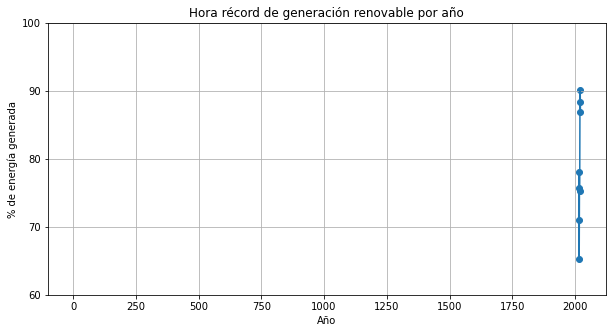

In [13]:
x = max_generation['year']
y = max_generation['Renovable']

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(x,max_generation['Renovable']*100, 0.3, )
ax.scatter(x,y*100)

ax.set_title('Hora récord de generación renovable por año')
ax.set_xlabel('Año')
ax.set_ylabel('% de energía generada')
ax.set_yticks(range(0,110,10))
ax.set_ylim([60,100])
ax.grid(True)
#fig.legend()
plt.savefig('figures/simp_year_record.png')

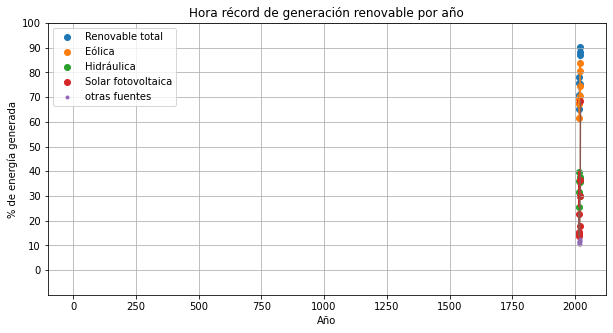

In [14]:
x = max_generation['year']


fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x,max_generation['Renovable']*100, marker='o', label='Renovable total')
plt.plot(x,max_generation['Renovable']*100, alpha=0.3, )
ax.scatter(x,max_generation['Eólica']*100, marker='o', label='Eólica')
plt.plot(x,max_generation['Eólica']*100, 0.3, )
ax.scatter(x,max_generation['Hidráulica']*100, marker='o', label='Hidráulica')
plt.plot(x,max_generation['Hidráulica']*100, 0.3, )
ax.scatter(x,max_generation['solar']*100, marker='o', label='Solar fotovoltaica')
plt.plot(x,max_generation['solar']*100, 0.3, )
ax.scatter(x,max_generation['otros']*100, marker='.', label='otras fuentes')
plt.plot(x,max_generation['otros']*100, alpha=0.3, )

ax.set_title('Hora récord de generación renovable por año')
ax.set_xlabel('Año')
ax.set_ylabel('% de energía generada')
ax.set_yticks(range(0,110,10))
ax.set_ylim([-10,100])
ax.grid(True)
ax.legend(loc='best')
plt.savefig('figures/ren_year_record.png')

# Genración media renovable por año

In [15]:
data = []
for year in df['year'].unique():
    data.append(df[df['year'] == year][['year','Renovable','Solar','Solar fotovoltaica','Solar térmica','Térmica renovable','Hidráulica','Eólica']].mean())

In [16]:
div_ren = pd.DataFrame(data)
div_ren['solar'] = div_ren['Solar'] + div_ren['Solar fotovoltaica']
div_ren['otros'] = div_ren['Térmica renovable'] + div_ren['Solar térmica']
div_ren

,year,Renovable,Solar,Solar fotovoltaica,Solar térmica,Térmica renovable,Hidráulica,Eólica,solar,otros
0,2015.0,0.355694,0.019991,0.016608,0.012059,0.012011,0.097577,0.197448,0.036599,0.024070
1,2016.0,0.386875,0.000000,0.027280,0.019506,0.014882,0.129984,0.195223,0.027280,0.034388
2,2017.0,0.318717,0.000000,0.029166,0.020136,0.014892,0.063588,0.190936,0.029166,0.035028
3,2018.0,0.379310,0.000000,0.027757,0.016610,0.014456,0.124405,0.196081,0.027757,0.031066
4,2019.0,0.373441,0.000000,0.034423,0.020036,0.014937,0.090139,0.213905,0.034423,0.034973
5,2020.0,0.444925,0.000000,0.061379,0.018479,0.019940,0.116097,0.229030,0.061379,0.038419
6,2021.0,0.478428,0.000000,0.080095,0.018663,0.020248,0.110743,0.248679,0.080095,0.038910
7,2022.0,0.466805,0.002626,0.113777,0.018119,0.021026,0.059767,0.251490,0.116403,0.039144


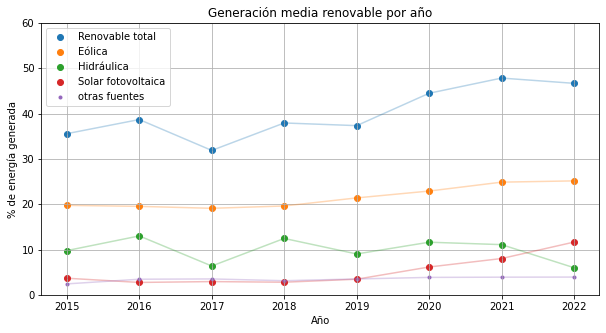

In [17]:
x = div_ren['year']


fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x,div_ren['Renovable']*100, marker='o', label='Renovable total')
plt.plot(x,div_ren['Renovable']*100, alpha=0.3, )
ax.scatter(x,div_ren['Eólica']*100, marker='o', label='Eólica')
plt.plot(x,div_ren['Eólica']*100, alpha=0.3, )
ax.scatter(x,div_ren['Hidráulica']*100, marker='o', label='Hidráulica')
plt.plot(x,div_ren['Hidráulica']*100, alpha=0.3, )
ax.scatter(x,div_ren['solar']*100, marker='o', label='Solar fotovoltaica')
plt.plot(x,div_ren['solar']*100, alpha=0.3, )
ax.scatter(x,div_ren['otros']*100, marker='.', label='otras fuentes')
plt.plot(x,div_ren['otros']*100, alpha=0.3, )

ax.set_title('Generación media renovable por año')
ax.set_xlabel('Año')
ax.set_ylabel('% de energía generada')
ax.set_yticks(range(0,65,10))
#ax.set_ylim([0,100])
#ax.set_xlim([2016.5,2022.5])
ax.grid(True)
ax.legend(loc='best')
plt.savefig('figures/ren_year_avg.png')

# Genración media no renovable por año

In [18]:
df.head()

,Carbón,Ciclo combinado,Cogeneración y resto,Enlace Península-Baleares,Eólica,Fuel-gas,Hidráulica,Intercambios,No renovable,Nuclear,...,Resto generación,Solar,Solar fotovoltaica,Solar térmica,Térmica renovable,total,year,solar,otros,renov+nuclear
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,0.202468,0.133312,0.0,-0.005203,0.252862,0.0,0.083422,-0.048297,0.661828,0.278950,...,0.100598,0.001887,0.0,0.0,0.0,1.0,2015,0.001887,0.0,0.617122
2015-01-01 01:00:00+01:00,0.207796,0.155604,0.0,-0.004216,0.241960,0.0,0.073858,-0.070444,0.682223,0.289515,...,0.103969,0.001958,0.0,0.0,0.0,1.0,2015,0.001958,0.0,0.607291
2015-01-01 02:00:00+01:00,0.215856,0.155865,0.0,-0.003791,0.240220,0.0,0.053875,-0.085799,0.703805,0.310432,...,0.111242,0.002100,0.0,0.0,0.0,1.0,2015,0.002100,0.0,0.606627
2015-01-01 03:00:00+01:00,0.206791,0.140006,0.0,-0.002899,0.245377,0.0,0.014696,-0.056920,0.737683,0.331861,...,0.118843,0.002244,0.0,0.0,0.0,1.0,2015,0.002244,0.0,0.594178
2015-01-01 04:00:00+01:00,0.199047,0.136983,0.0,-0.002970,0.243696,0.0,-0.004331,-0.046101,0.758601,0.349318,...,0.122324,0.002034,0.0,0.0,0.0,1.0,2015,0.002034,0.0,0.590717


In [19]:
data = []
for year in df['year'].unique():
    data.append(df[df['year'] == year][['year','No renovable','Carbón','Ciclo combinado','Cogeneración y resto','Nuclear',]].mean())
div_no_ren = pd.DataFrame(data)   

In [20]:
div_no_ren

,year,No renovable,Carbón,Ciclo combinado,Cogeneración y resto,Nuclear
0,2015.0,0.644306,0.206307,0.102836,0.063362,0.225842
1,2016.0,0.613125,0.140549,0.101269,0.117558,0.229385
2,2017.0,0.681283,0.168175,0.129967,0.125867,0.225674
3,2018.0,0.620690,0.138353,0.102576,0.128163,0.214266
4,2019.0,0.626559,0.042926,0.203632,0.132232,0.229442
5,2020.0,0.555075,0.021428,0.160267,0.128224,0.239486
6,2021.0,0.521572,0.021255,0.155881,0.118672,0.228265
7,2022.0,0.533195,0.033728,0.263339,0.085240,0.240974


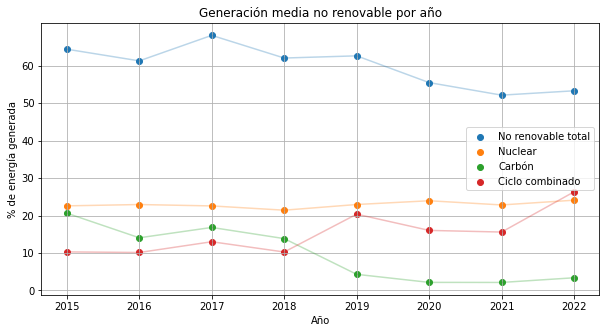

In [21]:
x = div_no_ren['year']


fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x,div_no_ren['No renovable']*100, marker='o', label='No renovable total')
plt.plot(x,div_no_ren['No renovable']*100, alpha=0.3, )
ax.scatter(x,div_no_ren['Nuclear']*100, marker='o', label='Nuclear')
plt.plot(x,div_no_ren['Nuclear']*100, alpha=0.3, )
ax.scatter(x,div_no_ren['Carbón']*100, marker='o', label='Carbón')
plt.plot(x,div_no_ren['Carbón']*100, alpha=0.3, )
ax.scatter(x,div_no_ren['Ciclo combinado']*100, marker='o', label='Ciclo combinado')
plt.plot(x,div_no_ren['Ciclo combinado']*100, alpha=0.3, )


ax.set_title('Generación media no renovable por año')
ax.set_xlabel('Año')
ax.set_ylabel('% de energía generada')
ax.set_yticks(range(0,65,10))
#ax.set_ylim([0,100])
#ax.set_xlim([2016.5,2022.5])
ax.grid(True)
ax.legend(loc='best')
plt.savefig('figures/nonren_year_avg.png')

# Grafica de los porcentajes

In [22]:
df = df.fillna(0)
df.head()

,Carbón,Ciclo combinado,Cogeneración y resto,Enlace Península-Baleares,Eólica,Fuel-gas,Hidráulica,Intercambios,No renovable,Nuclear,...,Resto generación,Solar,Solar fotovoltaica,Solar térmica,Térmica renovable,total,year,solar,otros,renov+nuclear
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,0.202468,0.133312,0.0,-0.005203,0.252862,0.0,0.083422,-0.048297,0.661828,0.278950,...,0.100598,0.001887,0.0,0.0,0.0,1.0,2015,0.001887,0.0,0.617122
2015-01-01 01:00:00+01:00,0.207796,0.155604,0.0,-0.004216,0.241960,0.0,0.073858,-0.070444,0.682223,0.289515,...,0.103969,0.001958,0.0,0.0,0.0,1.0,2015,0.001958,0.0,0.607291
2015-01-01 02:00:00+01:00,0.215856,0.155865,0.0,-0.003791,0.240220,0.0,0.053875,-0.085799,0.703805,0.310432,...,0.111242,0.002100,0.0,0.0,0.0,1.0,2015,0.002100,0.0,0.606627
2015-01-01 03:00:00+01:00,0.206791,0.140006,0.0,-0.002899,0.245377,0.0,0.014696,-0.056920,0.737683,0.331861,...,0.118843,0.002244,0.0,0.0,0.0,1.0,2015,0.002244,0.0,0.594178
2015-01-01 04:00:00+01:00,0.199047,0.136983,0.0,-0.002970,0.243696,0.0,-0.004331,-0.046101,0.758601,0.349318,...,0.122324,0.002034,0.0,0.0,0.0,1.0,2015,0.002034,0.0,0.590717


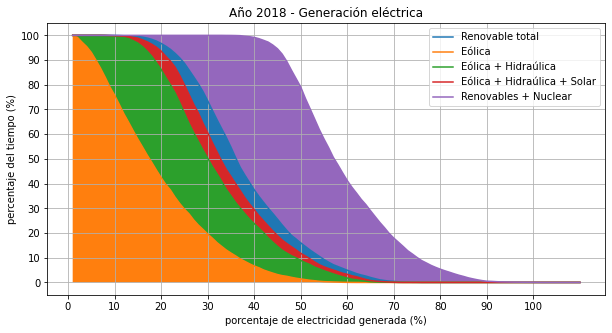

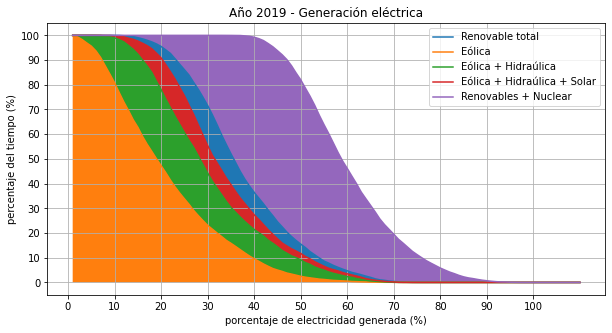

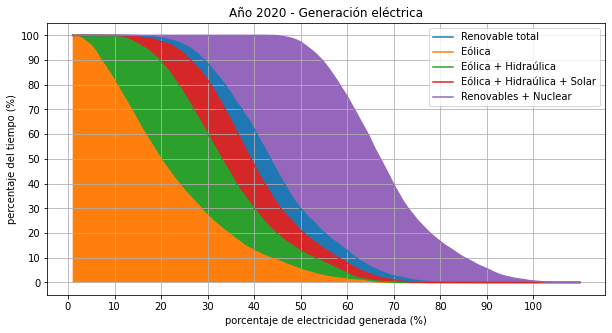

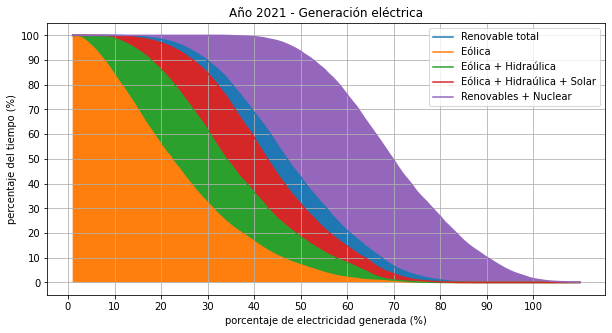

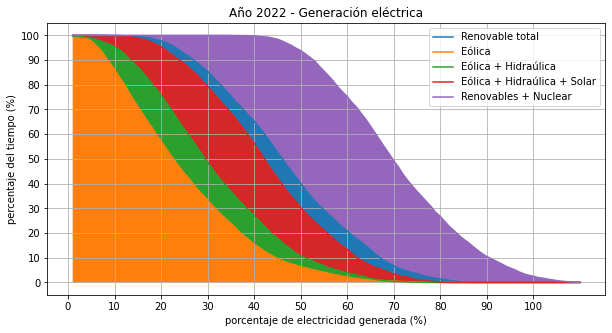

In [31]:
# datos para la grafica
import imageio
images_for_gif = []

for year in df['year'].unique():
    if year <= 2017:
        continue
    temp_df = df[df['year'] == year]

    energy = []
    time_renov = []
    time_eolica = []
    time_pv = []
    time_hidr = []
    time_otro_rev = []
    time_eolica_hidr = []
    time_eolica_hidr_solar = []
    time_renov_nuclear = []
    len_df = len(temp_df)

    for i in range(1,111):
        energy.append(i)
        time_renov.append(sum(temp_df['Renovable'] > i/100)*100/len_df)
        time_eolica.append(sum(temp_df['Eólica'] > i/100)*100/len_df)
        time_hidr.append(sum(temp_df['Hidráulica'] > i/100)*100/len_df)
        time_eolica_hidr.append(sum(temp_df['Eólica']+temp_df['Hidráulica'] > i/100)*100/len_df)
        time_pv.append(sum(temp_df['solar'] > i/100)*100/len_df)
        time_eolica_hidr_solar.append(sum(temp_df['Eólica']+temp_df['Hidráulica']+temp_df['solar'] > i/100)*100/len_df)
        time_otro_rev.append(sum(temp_df['otros'] > i/100)*100/len_df)
        time_renov_nuclear.append(sum(temp_df['Renovable']+temp_df['Nuclear'] > i/100)*100/len_df)


    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(energy,time_renov, label='Renovable total', )
    ax.fill_between(energy,time_renov,time_eolica_hidr_solar,)
    ax.plot(energy,time_eolica, label='Eólica', )
    ax.fill_between(energy,time_eolica,)
    #ax.plot(energy,time_hidr, label='Hidraúlica' )
    ax.plot(energy,time_eolica_hidr, label='Eólica + Hidraúlica', )
    ax.fill_between(energy,time_eolica_hidr,time_eolica, )
    #ax.plot(energy,time_pv, label='Solar fotovoltaica')
    ax.plot(energy,time_eolica_hidr_solar, label='Eólica + Hidraúlica + Solar', )
    ax.fill_between(energy,time_eolica_hidr_solar,time_eolica_hidr, )
    #ax.plot(energy,time_otro_rev, label='Otras fuentes renovables')
    ax.plot(energy,time_renov_nuclear, label='Renovables + Nuclear')
    ax.fill_between(energy,time_renov_nuclear,time_renov, )

    
    
    ax.set_xticks(range(0,110,10))
    ax.set_yticks(range(0,110,10))
    
    ax.grid(True)
    ax.legend(loc='best')
    
    ax.set_title(f'Año {year} - Generación eléctrica')
    ax.set_xlabel('porcentaje de electricidad generada (%)')
    ax.set_ylabel('percentaje del tiempo (%)')
    plt.savefig(f'figures/porcentajes-generacion-renovables_{year}.png',facecolor='w')
    images_for_gif.append(f'figures/porcentajes-generacion-renovables_{year}.png')
    plt.show()

In [32]:
#imageio.mimsave('figures/porcentajes-generacion-renovables.gif', images_for_gif, fps=1)

with imageio.get_writer('figures/porcentajes-generacion-renovables.gif', mode='I', duration = 1) as writer:
    for filename in images_for_gif:
        image = imageio.imread(filename)
        writer.append_data(image)

C:\Users\JorgeAvila\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  """


In [ ]:
time_renov_nuclear[-20:]

[9.53476482617587,
 8.601738241308793,
 7.694274028629857,
 6.658997955010225,
 5.8537832310838445,
 5.112474437627812,
 4.192229038854806,
 3.450920245398773,
 2.9013292433537834,
 2.505112474437628,
 1.9938650306748467,
 1.738241308793456,
 1.3548057259713702,
 1.0736196319018405,
 0.7540899795501023,
 0.5495910020449898,
 0.3450920245398773,
 0.1661554192229039,
 0.08946830265848671,
 0.07668711656441718]

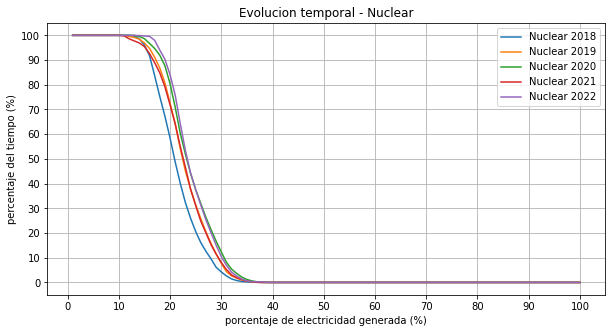

In [ ]:
kind = 'Nuclear'
temp_serie = pd.DataFrame()
for year in df['year'].unique():
    temp_df = df[df['year'] == year]

    energy = []
    time_renov = []
    time_eolica = []
    time_pv = []
    time_hidr = []
    
    len_df = len(temp_df)

    for i in range(1,101):
        energy.append(i)
        time_renov.append(sum(temp_df[f'{kind}'] > i/100)*100/len_df)


    temp_serie[f'{year}'] = time_renov

fig, ax = plt.subplots(figsize=(10, 5))
for year in df['year'].unique()[-5:]:   
    ax.plot(energy,temp_serie[f'{year}'], label=f'{kind} {year}')
ax.set_title(f'Evolucion temporal - {kind}')
ax.set_xticks(range(0,110,10))
ax.set_yticks(range(0,110,10))    
ax.grid(True)
ax.legend(loc='best')
ax.set_xlabel('porcentaje de electricidad generada (%)')
ax.set_ylabel('percentaje del tiempo (%)')
plt.show()
